# Generative Adversarial Networks for generating weakly-reflexive fuzzy relations:

---

## Contents:

* Definition of Weakly-Reflexive Property in Fuzzy Relations
* Overview of the GANs architecture
* Building the architecture (Discriminator and Generator)
* Training the model
* Evaluating a performance measure
* Generated relations

### Definition of Weakly-Reflexive Property in Fuzzy Relations

---

<p align="justify">
Consider the universe X = {$a_1$, $a_2$, $a_3$}. The fuzzy relation $R^`$ defined over X is,
    
$$R^` =
  \left[ {\begin{array}{cc}
    a_{11} & a_{12} & a_{13} \\
    a_{21} & a_{22} & a_{23} \\
    a_{31} & a_{32} & a_{33}
  \end{array} } \right]
$$
    
$R^`$ is 'wealy-reflexive' if, $\forall x,y$ $\in X$, $μ_{R^`} (x,y) ≤ μ_{R^`} (x,x)$ and $μ_{R^`} (y,x) ≤ μ_{R^`} (x,x)$.
    
For example,
    
$$R^` =
  \left[ {\begin{array}{cc}
    0.9 & 0.1 & 0.15 \\
    0.1 & 0.95 & 0.15 \\
    0.25 & 0.35 & 0.9
  \end{array} } \right]
$$
</p>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Examples of weakly-reflexive relations

relations = [np.array([0.9, 0, 0.1, 0.1, 0.95, 0.15, 0, 0.1, 0.9]),
       np.array([0.95, 0.3, 0.1, 0.13, 1, 0.25, 0, 0.1, 1]),
       np.array([0.9, 0.3, 0.13, 0.1, 1, 0.15, 0, 0.1, 0.85]),
       np.array([0.91, 0, 0.1, 0.1, 0.93, 0.15, 0.3, 0.1, 0.9]),
       np.array([0.97, 0, 0.15, 0.1, 0.95, 0.15, 0.2, 0.1, 1])]

# Examples of noisy relations

noise = []
for i in range(5):
    noise.append(np.random.rand(3,3))
noise

[array([[0.16890833, 0.50205422, 0.9195865 ],
        [0.67146468, 0.32165922, 0.89209904],
        [0.43081573, 0.33414128, 0.96632312]]),
 array([[0.34054708, 0.81409778, 0.14863399],
        [0.08724574, 0.95480467, 0.94083894],
        [0.44123363, 0.48454944, 0.7569138 ]]),
 array([[0.61592434, 0.64467879, 0.49064279],
        [0.21874193, 0.68424011, 0.23128037],
        [0.95184296, 0.39604915, 0.49413591]]),
 array([[0.2115238 , 0.191539  , 0.88951168],
        [0.33030277, 0.12055976, 0.57228127],
        [0.98413375, 0.07964946, 0.77365423]]),
 array([[0.59786078, 0.46076183, 0.45087316],
        [0.60855751, 0.43727529, 0.66709236],
        [0.6771405 , 0.68415574, 0.54127144]])]

### Overview of the GANs architecture

---

In this model, two networks are to build which will work in tandum, to produce/generate our desired results, which in this case is a matrix which is weakly-reflexive. In other words, the diagonal elements of the matrix are the ones with the maximum values.
To satisfy this requirement, a generator will try to generate matrices which satisfy the given criteria while the discriminator will check whether criteria is satisfied.


* **Generator ~**


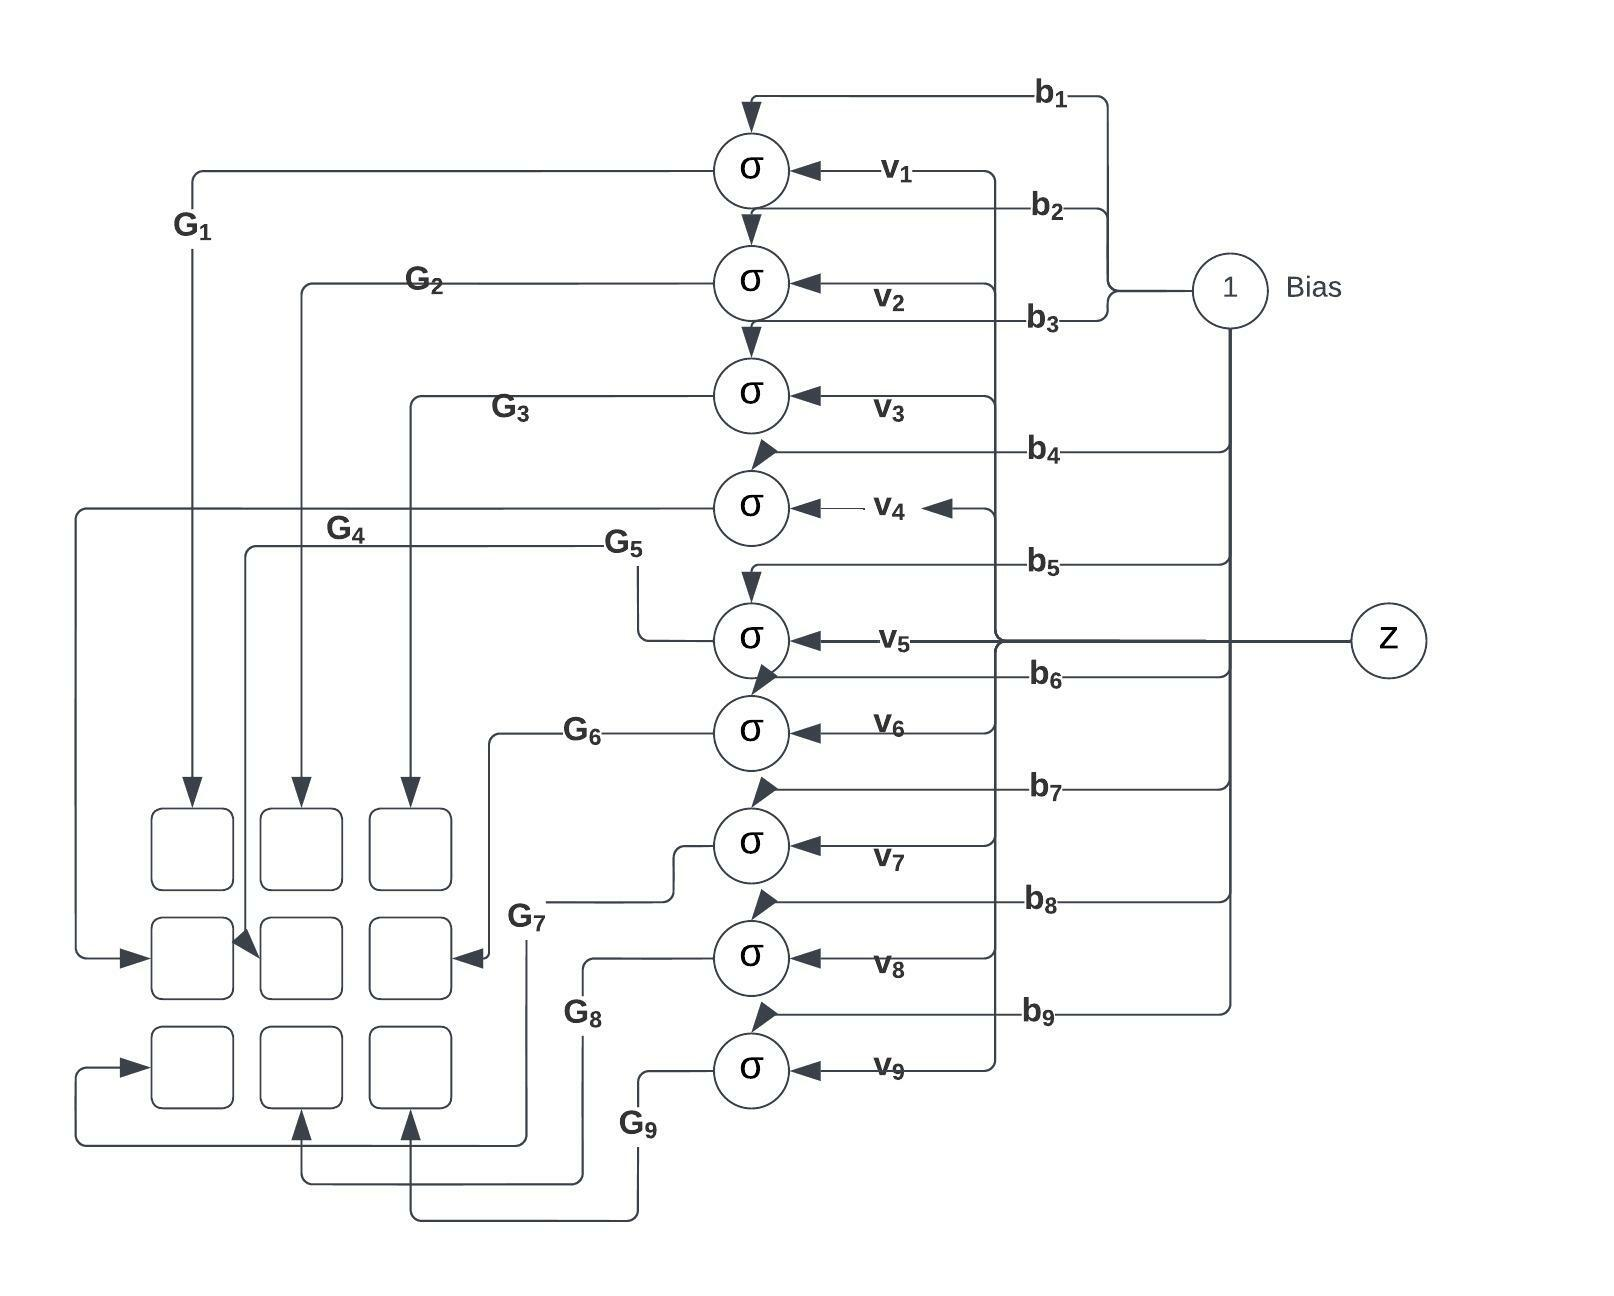

In [3]:
import os
from IPython.display import Image
Image(filename="../input/networks/Generator.jpeg", width= 600)


**Predictions**: 

$$G(z) = (G_1, G_2, G_3, G_4, G_5, G_6, G_7, G_8, G_9)$$
$$G(z) = (\sigma(v_1z+b_1), \sigma(v_2z+b_2), \sigma(v_3z+b_3), \sigma(v_4z+b_4), \sigma(v_5z+b_5), \sigma(v_6z+b_6), \sigma(v_7z+b_7), \sigma(v_8z+b_8), \sigma(v_9z+b_9))$$
$$D(G(z)) = \sigma(G_1w_1 + G_2w_2 + G_3w_3 + G_4w_4 + G_5w_5 + G_6w_6 + G_7w_7 + G_8w_8 + G_9w_9 + b)$$

**Loss Function**:

$$J = - \ln(D(G(z)))$$

* **Discriminator ~**

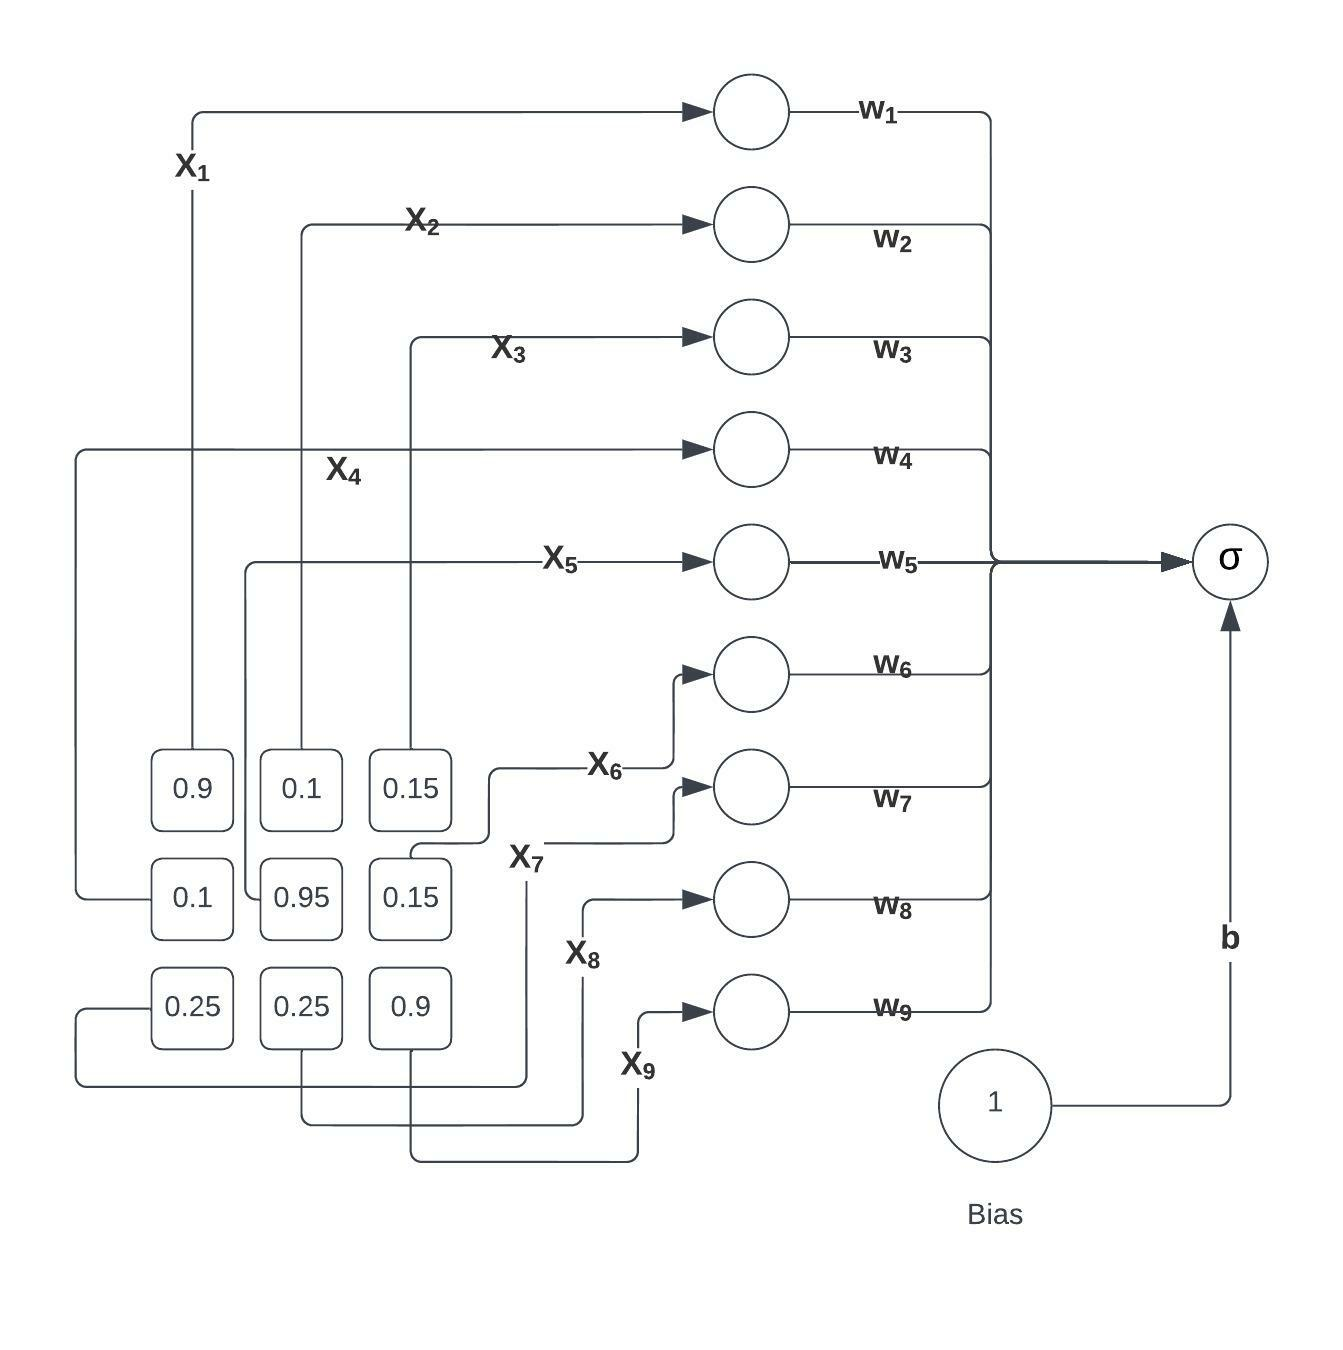

In [4]:
import os
from IPython.display import Image
Image(filename="../input/networks/Discriminator.jpeg", width= 500)

**Prediction**:

$$D(x) = \sigma(x_1w_1 + x_2w_2 + x_3w_3 + x_3w_3 + x_4w_4 + x_5w_5 + x_6w_6 + x_7w_7 + x_8w_8 + x_9w_9)$$


**Loss Function**:

* From images:
$$J = -\ln(D(x))$$

* From noise:
$$J = -\ln(1-D(x))$$

### Building the architecture (Discriminator and Generator)

---

The Discriminator and Generator are built according to the architectures shown above, in this step.

In [5]:
def sigmoid(x):
    return np.exp(x)/(1.0 + np.exp(x))

* **Discriminator ~**

In [6]:
class Discriminator():
    def __init__(self):
        # Randomizing weights for each edge
        self.weights = np.array([np.random.normal() for i in range(9)])
        self.bias = np.random.normal()
        
    def forward(self, x):
        # Forward pass
        return sigmoid(np.dot(x, self.weights) + self.bias)
    
    def error_from_mat(self, rel):
        prediction = self.forward(rel)
        # For the prediction to be 1, the error is -log(prediction)
        return -np.log(prediction)
    
    def derivatives_from_mat(self, rel):
        prediction = self.forward(rel)
        derivatives_weights = -rel * (1-prediction)
        derivative_bias = -(1-prediction)
        return derivatives_weights, derivative_bias
    
    def update_from_mat(self, x):
        ders = self.derivatives_from_mat(x)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]
        
    def error_from_noise(self, noise):
        prediction = self.forward(noise)
        # For the prediction to be 0, the error is -log(1-prediction)
        return -np.log(1-prediction)
    
    def derivatives_from_noise(self, noise):
        prediction = self.forward(noise)
        derivatives_weights = noise * prediction
        derivative_bias = prediction
        return derivatives_weights, derivative_bias
    
    def update_from_noise(self, noise):
        ders = self.derivatives_from_noise(noise)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

* **Generator ~**

In [7]:
class Generator():
    def __init__(self):
        self.weights = np.array([np.random.normal() for i in range(9)])
        self.biases = np.array([np.random.normal() for i in range(9)])

    def forward(self, z):
        # Forward pass
        return sigmoid(z * self.weights + self.biases)

    def error(self, z, discriminator):
        x = self.forward(z)
        # For the prediction to be 0, the error is -log(1-prediction)
        y = discriminator.forward(x)
        return -np.log(y)
    
    def derivatives(self, z, discriminator):
        discriminator_weights = discriminator.weights
        discriminator_bias = discriminator.bias
        x = self.forward(z)
        y = discriminator.forward(x)
        factor = -(1-y) * discriminator_weights * x *(1-x)
        derivatives_weights = factor * z
        derivative_bias = factor
        return derivatives_weights, derivative_bias

    def update(self, z, discriminator):
        error_before = self.error(z, discriminator)
        ders = self.derivatives(z, discriminator)
        self.weights -= learning_rate * ders[0]
        self.biases -= learning_rate * ders[1]
        error_after = self.error(z, discriminator)

### Training the model

---

In this step, the discriminator and generator networks are trained in tandum.

In [8]:
# Set random seed
np.random.seed(42)

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# The GAN
D = Discriminator()
G = Generator()

# For the error plot
errors_discriminator = []
errors_generator = []

for epoch in range(epochs):
    
    for rel in relations:
        
        # Update the discriminator weights from the real weakly-reflexive relation
        D.update_from_mat(rel)
    
        # Pick a random number to generate a fake weakly-reflexive relation
        z = np.random.rand()

        # Calculate the discriminator error
        errors_discriminator.append(sum(D.error_from_mat(rel) + D.error_from_noise(z)))
        
        # Calculate the generator error
        errors_generator.append(G.error(z, D))
        
        # Build a fake weakly-reflexive relation
        noise = G.forward(z)
        
        # Update the discriminator weights from the fake weakly-reflexive relation
        D.update_from_noise(noise)
    
        # Update the generator weights from the fake weakly-reflexive relation
        G.update(z, D)

### Evaluating a performance measure

---

The error function for both the discriminator and generator is measured here.

* **Generator ~**

Generator Weights: 	 [ 1.20319397 -2.24475688 -0.88083686 -2.59509499  0.44485039 -1.1840856
 -1.95093135 -0.40805691  0.22825663]





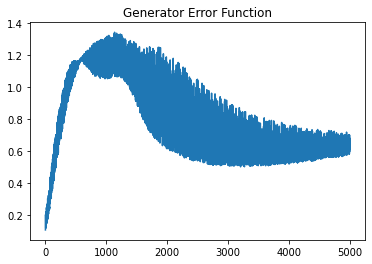

In [9]:
plt.plot(errors_generator)
plt.title("Generator Error Function")
print("Generator Weights: \t", G.weights)
print("\n\n")

* **Discriminator ~**


Discriminator Weights: 	 [ 0.2471167  -0.77123181 -0.43709866 -1.24497339  1.70243155  0.66317814
 -1.12502405 -0.71660741  1.34777346]





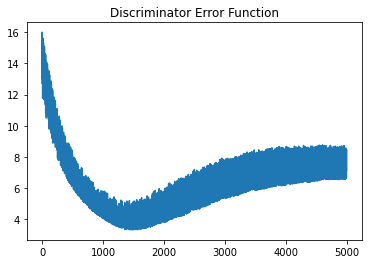

In [10]:
plt.plot(errors_discriminator)
plt.title("Discriminator Error Function")
print("Discriminator Weights: \t", D.weights)
print("\n\n")

### Generated relations

---

The generated weakly-reflexive matrices are shown in this step.

In [11]:
generated_relations = []
for i in range(9):
    z = np.random.random()
    generated_relation = G.forward(z)
    generated_relations.append(generated_relation)
for i in generated_relations:
    print("Generated Relation: \n")
    print(np.reshape(i, (-1, 3)))
    print("\n\n")

Generated Relation: 

[[0.94735027 0.01726741 0.03947528]
 [0.03026263 0.97241325 0.06696638]
 [0.0302339  0.04963526 0.94888027]]



Generated Relation: 

[[0.94947895 0.01594241 0.03828492]
 [0.02762643 0.97284158 0.06433974]
 [0.02823231 0.04894371 0.94927923]]



Generated Relation: 

[[0.91765793 0.04118039 0.05514372]
 [0.08062797 0.96724269 0.10314175]
 [0.06348834 0.05788484 0.94428766]]



Generated Relation: 

[[0.93509982 0.02590794 0.04612696]
 [0.04797773 0.97012175 0.08199274]
 [0.04278688 0.05331318 0.94679639]]



Generated Relation: 

[[0.9504291  0.01536787 0.03774982]
 [0.02649171 0.97303613 0.06316577]
 [0.02735668 0.04862915 0.94946147]]



Generated Relation: 

[[0.96700301 0.0070228  0.02795249]
 [0.01078059 0.97686018 0.04252198]
 [0.01393934 0.04238823 0.9531869 ]]



Generated Relation: 

[[0.9563277  0.01203423 0.03437087]
 [0.02002258 0.97429557 0.05585553]
 [0.02217183 0.04658617 0.95065745]]



Generated Relation: 

[[0.96514146 0.00780187 0.02910496]
 [0.